In [1]:
# get all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(42)

In [2]:
# function to read csv files
def read_csv(fname):
    data = pd.read_csv(fname, header=None).to_numpy()
    N = data.shape[0]
    X = np.resize(data[:, 0], (N, 1))
    y = np.resize(data[:, 1], (N, 1))
    return (X, y)

In [3]:
# function to plot the train data/test data with predictions
def plot_data(x, y, title, yp=None, labels=None):
    plt.scatter(x, y, c='r', marker='+', label=labels[0])
    if yp is not None:
        plt.scatter(x, yp, c='b', marker='+', label=labels[1])
    plt.title(title)
    plt.xlabel("x-axis")
    plt.ylabel("y-axis")
    plt.legend(loc="best")
    plt.show()

In [4]:
class ArtificialNeuralNetwork:
    def __init__(self, n_hidden_units=5, learning_rate=1e-3):
        # weights between input and hidden layer
        self.W1 = np.random.random((1, n_hidden_units))
        # bias for hidden layer (each node has a bias)
        self.B1 = np.random.random(n_hidden_units)
        # weight between hidden layer and output layer
        self.W2 = np.random.random((n_hidden_units, 1))
        # bias for output layer (each node has a bias)
        self.B2 = np.random.random(1)
        self.lr = learning_rate
    
    # sigmoid activation
    def sigmoid(self, x):
        return 1/(1 + np.exp(-x))
        
    # mse loss
    def mse_loss(self, y, yp):
        return np.sum(((y - yp) ** 2))/(2*len(y))
        
    # forward prop, which computes the output for a given input as well as the gradients (only in train mode)
    # here 'a' is the pre-activation and 'z' is the activation
    # hidden layer has sigmoid activation and output layer has identity as we perform regression
    def forward(self, x, y=None, mode="train"):
        a1 = np.dot(x, self.W1) + self.B1
        z1 = self.sigmoid(a1)
        a2 = np.dot(z1, self.W2) + self.B2
        z2 = a2
        
        # eval mode has no learning, so don't compute gradients
        if mode == "eval":
            return z2
        # in train mode compute the gradients by chain rule
        elif mode == "train":
            self.dB2 = z2 - y
            self.dW2 = np.dot(z1.T, self.dB2)
            self.dB1 = z1 * (1 - z1) *  np.dot(self.dB2, self.W2.T)
            self.dW1 = np.dot(x.T, self.dB1) 
            self.mse_loss(y, a2)
    
    # use gradient descent to tweak the weights according to the gradients and learning_rate
    def update(self):
        self.W1 -= self.lr * self.dW1
        self.B1 -= self.lr * np.sum(self.dB1, axis=0)
        self.W2 -= self.lr * self.dW2
        self.B2 -= self.lr * np.sum(self.dB2, axis=0)
        
    # helps us predict output for a new set of input
    def predict(self, x):
        return self.forward(x, mode="eval")

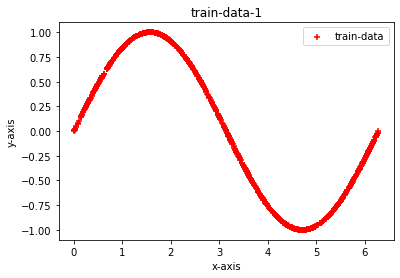

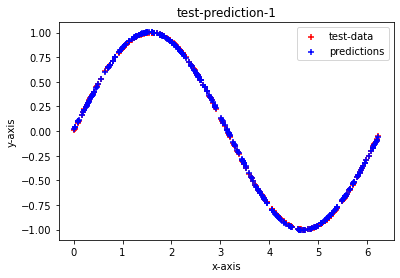

avg. train error:  0.000
avg. test error:  0.000


In [5]:
# load necessary files
base_path = "./Question1"
xtrain, ytrain = read_csv(f"{base_path}/Train_Dataset1.csv")
xtest, ytest = read_csv(f"{base_path}/Test_Dataset1.csv")
plot_data(xtrain, ytrain, title="train-data-1", labels=["train-data"])

# create the network and train for 100000 iterations for best results
ann = ArtificialNeuralNetwork(20, learning_rate=2e-4)
for i in range(100000):
    loss = ann.forward(xtrain, ytrain)
    ann.update()

# now predict on the test data
ypred = ann.predict(xtest)
# plot the predictions and check the train/test error
plot_data(xtest, ytest, yp=ypred, title="test-prediction-1", labels=["test-data", "predictions"])
print(f"avg. train error: {ann.mse_loss(ytrain, ann.predict(xtrain)):.3f}")
print(f"avg. test error: {ann.mse_loss(ytest, ypred):.3f}")

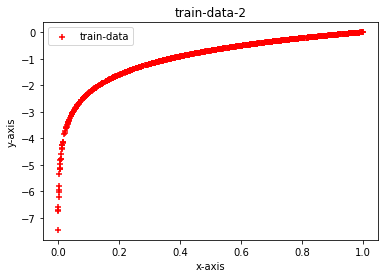

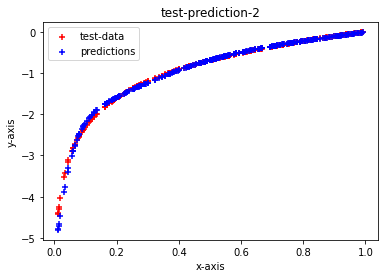

avg. train error:  0.007
avg. test error:  0.002


In [6]:
# load necessary files
xtrain, ytrain = read_csv(f"{base_path}/Train_Dataset2.csv")
xtest, ytest = read_csv(f"{base_path}/Test_Dataset2.csv")
plot_data(xtrain, ytrain, title="train-data-2", labels=["train-data"])

# create the network and train for 100000 iterations for best results
ann = ArtificialNeuralNetwork(30, learning_rate=2.5e-4)
for i in range(100000):
    loss = ann.forward(xtrain, ytrain)
    ann.update()

# now predict on the test data   
ypred = ann.predict(xtest)
# plot the predictions and check the train/test error
plot_data(xtest, ytest, yp=ypred, title="test-prediction-2", labels=["test-data", "predictions"])
print(f"avg. train error: {ann.mse_loss(ytrain, ann.predict(xtrain)):.3f}")
print(f"avg. test error: {ann.mse_loss(ytest, ypred):.3f}")